# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import missingno as msno
import scipy.stats as st

%matplotlib inline
sns.set



<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

# 2. Data Loading

In [131]:
train_data=pd.read_csv('/Users/huitingsheng/Downloads/Github/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/Users/huitingsheng/Downloads/Github/house-prices-advanced-regression-techniques/test.csv')
train_df = train_data.drop("Id", axis=1)
test_df = test_data.drop("Id", axis=1)


In [132]:
train_df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [133]:
train_df.shape



(1460, 80)

There is quite an impressive number of columns: 80


In [5]:
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [134]:
train_data.describe(include="all")



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# 3.Target variable: Sales Price Analysis
First, let us take a look at the target variable, as it is the one we want to understand and predict

In [135]:
train_df["SalePrice"].describe()



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The skewness is: 1.882876


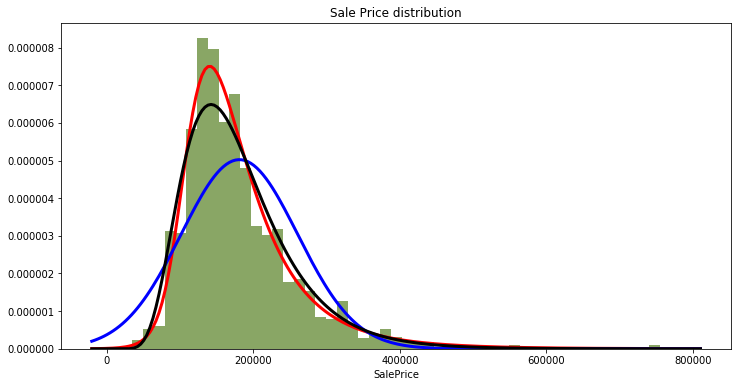

In [136]:
plt.figure(figsize=(12, 6))
#sns.distplot(train_data["SalePrice"], fit = st.norm)
plt.figure(1); plt.title('Sale Price distribution')
sns.distplot(train_df["SalePrice"], kde=False, fit=st.johnsonsu, fit_kws={"color":"red","lw": 3, "label": "johnsonsu"})
sns.distplot(train_df["SalePrice"], kde=False, fit=st.norm, fit_kws={"color":"blue","lw": 3, "label": "norm"})
sns.distplot(train_df["SalePrice"], kde=False, fit=st.lognorm, fit_kws={"color": "black", "lw": 3, "label": "log normal"})
# skewness of sale price
print("The skewness is: %f" % train_data["SalePrice"].skew())


It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

# 4. Check Numeric Features

Let us start by taking a look at the numerical variables. Given the amount of the variables, to narrow them down, a good apprach might be taking a look at correlation with the target and focus just on the variables that are more correlated with the target (>0.5).


In [137]:
# extrac numerica features
numerical_train = train_df.select_dtypes(["float64","int64"])
numerical_test = train_df.select_dtypes(["float64","int64"])
numerical_train.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


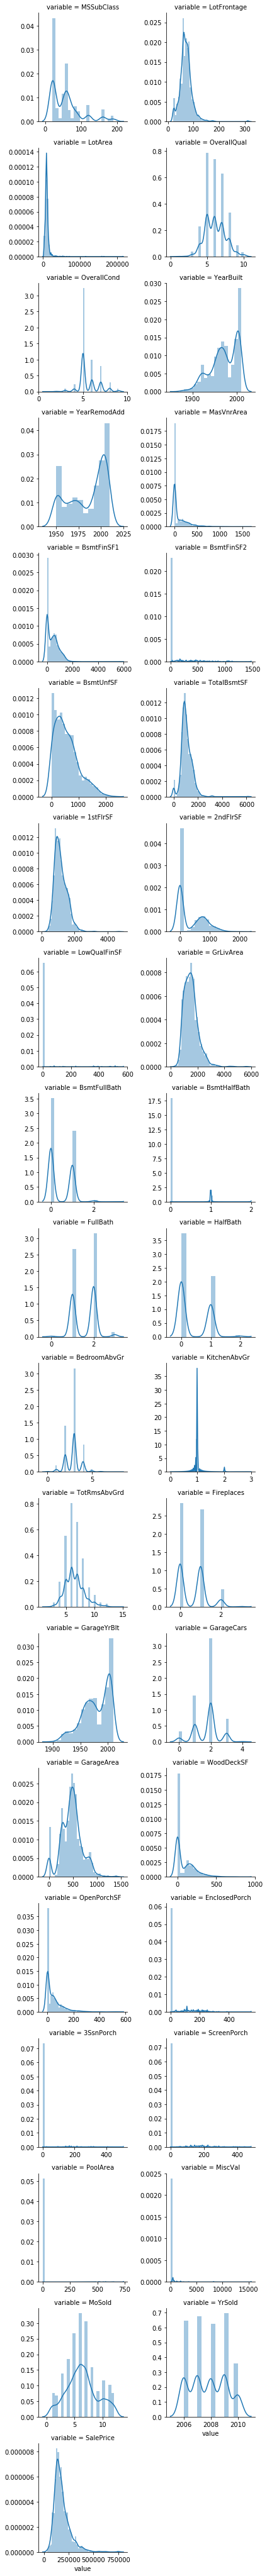

In [10]:
f = pd.melt(train_data, value_vars=numerical_train.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g.map(sns.distplot, "value")

some of the features need transformation

In [138]:
# Train Numerical missing data
Missing_percent = (numerical_train.isnull().sum()/train_data.shape[0]).sort_values(ascending=False)
total_missing = numerical_train.isnull().sum().sort_values(ascending = False)

missing= pd.concat([total_missing, Missing_percent], axis =1, keys =["Counts", "Missing Percent"])
missing[missing["Missing Percent"]>0]


,Counts,Missing Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479


In [139]:
# fill missing GarageYrBlt with the house built year
GrageYrBlt_na_index = train_data.index[numerical_train["GarageYrBlt"].isnull()]
train_data.loc[GrageYrBlt_na_index,"GarageYrBlt"] = train_data.loc[GrageYrBlt_na_index,"YearBuilt"]

# fill missing LotFrontage with the average LotFrontage
train_data["LotFrontage"].fillna(round(train_data["LotFrontage"].mean(),1),inplace=True)

# drop record missing MasVnrArea
MasVnrArea_na_index = train_data.index[numerical_train["MasVnrArea"].isnull()]
train_data= train_data.drop(MasVnrArea_na_index)




In [140]:
# Test Numerical missing data
numerical_test = test_data.select_dtypes(["float64","int64"])
Missing_percent = (numerical_test.isnull().sum()/numerical_test.shape[0]).sort_values(ascending=False)
total_missing = numerical_test.isnull().sum().sort_values(ascending = False)

missing= pd.concat([total_missing, Missing_percent], axis =1, keys =["Counts", "Missing Percent"])
missing[missing["Missing Percent"]>0]

,Counts,Missing Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
BsmtFinSF2,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685


In [141]:
# fill missing GarageYrBlt with the house built year
GrageYrBlt_na_index = test_data.index[test_data["GarageYrBlt"].isnull()]
test_data.loc[GrageYrBlt_na_index,"GarageYrBlt"] = test_data.loc[GrageYrBlt_na_index,"YearBuilt"]

# fill missing LotFrontage with the average LotFrontage
test_data["LotFrontage"].fillna(round(test_data["LotFrontage"].mean(),1),inplace=True)

# drop other record have missing value

missing_index = test_data[pd.isnull(numerical_test).any(axis=1)].index

test_data= test_data.drop(missing_index)


In [142]:
# low variance
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(train_data.select_dtypes(["float64","int64"]))
train_data.select_dtypes(["float64","int64"]).columns[constant_filter.get_support()]

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

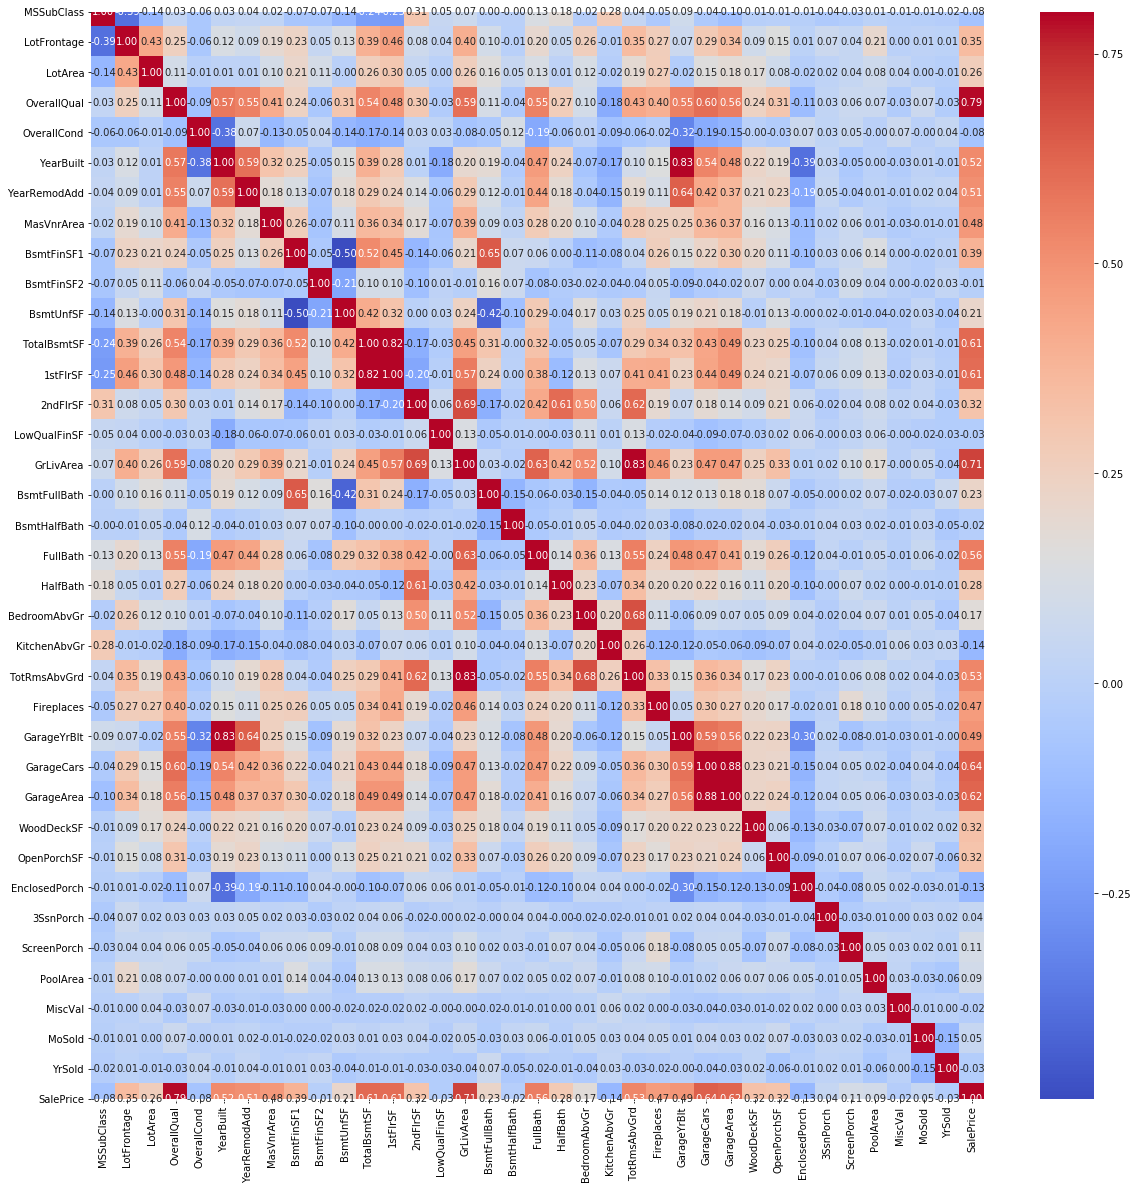

In [102]:
# check the corration of all numeric features
plt.subplots(figsize=(20, 20))
corrmat = numerical_train.corr()
sns.heatmap(corrmat,vmax =0.8, annot=True,fmt =".2f", cmap="coolwarm")


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


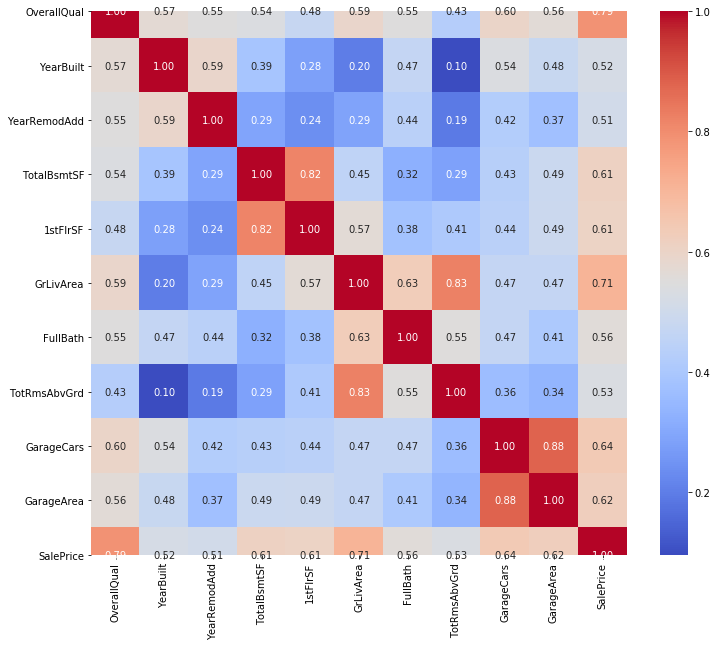

In [143]:
#most corr features to sale price
most_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]

plt.figure(figsize=(12,10))
sns.heatmap(numerical_train[most_corr_features].corr(), annot= True, fmt=".2f", cmap="coolwarm")
print(most_corr_features)



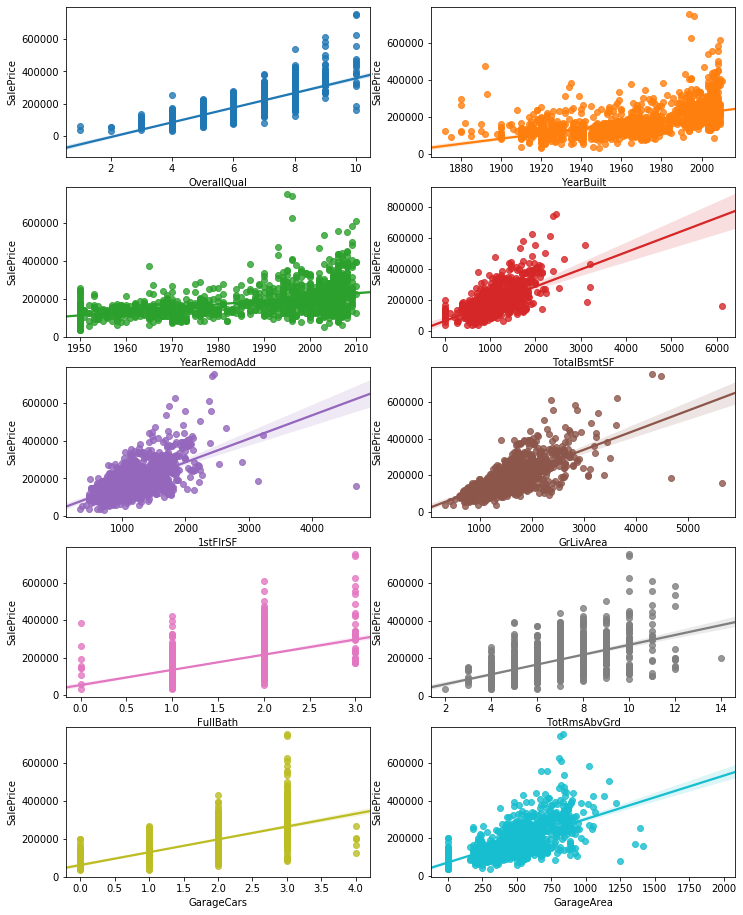

In [17]:
#plotting most correlated features
fig, axes = plt.subplots(5, 2, figsize = (12,16)) 

sns.regplot(data = train_data, x= "OverallQual", y = "SalePrice", ax = axes[0,0])
sns.regplot(data = train_data, x= "YearBuilt", y= "SalePrice", ax =axes[0,1])
sns.regplot(data = train_data, x= "YearRemodAdd", y = "SalePrice", ax = axes[1,0])
sns.regplot(data = train_data, x= "TotalBsmtSF", y = "SalePrice", ax = axes[1,1])
sns.regplot(data = train_data, x= "1stFlrSF", y = "SalePrice", ax = axes[2,0])
sns.regplot(data = train_data, x= "GrLivArea", y = "SalePrice", ax = axes[2,1])
sns.regplot(data = train_data, x= "FullBath", y = "SalePrice", ax = axes[3,0])
sns.regplot(data = train_data, x= "TotRmsAbvGrd", y = "SalePrice", ax = axes[3,1])
sns.regplot(data = train_data, x= "GarageCars", y = "SalePrice", ax = axes[4,0])
sns.regplot(data = train_data, x= "GarageArea", y = "SalePrice", ax = axes[4,1])


We can see that "OverallQual" and "GrLivArea" are the most correlated features. Some features are strongly correlated with each other: "TotalBsmtSF" with "1stFlrSF", "GrLivArea" with "TotRmsAbvGrd" and "GarageCars" with "GarageArea". To avoid multicollinearity, when modelling, we will drop from these couples the variable that is less correlated to the target .

In [144]:
# drop low correlated columns to sale price
train_data = train_data.drop(corrmat.index[abs(corrmat["SalePrice"])<=0.5], axis =1)

# drop high correlated columns
train_data =train_data.drop(["TotRmsAbvGrd", "GarageArea", "TotalBsmtSF"], axis=1)



In [145]:
# do the same for test

test_data= test_data.drop(corrmat.index[abs(corrmat["SalePrice"])<=0.5], axis =1)
test_data =test_data.drop(["TotRmsAbvGrd", "GarageArea", "TotalBsmtSF"], axis=1)

# 4.Categorical Variables
It's time to check how the categorical values relate to the target, However, in order to do so, missing values should be addressed first

In [146]:
#categorical
categorical_train = train_data.select_dtypes("object")
categorical_test = test_data.select_dtypes("object")
categorical_train.head()



,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [147]:
# Train Categorical missing data
Missing_percent = (categorical_train.isnull().sum()/categorical_train.shape[0]).sort_values(ascending=False)
total_missing = categorical_train.isnull().sum().sort_values(ascending = False)

missing= pd.concat([total_missing, Missing_percent], axis =1, keys =["Counts", "Missing Percent"])
missing[missing["Missing Percent"]>0]



,Counts,Missing Percent
PoolQC,1445,0.995179
MiscFeature,1398,0.962810
Alley,1362,0.938017
Fence,1171,0.806474
FireplaceQu,686,0.472452
GarageCond,81,0.055785
GarageQual,81,0.055785
GarageFinish,81,0.055785
GarageType,81,0.055785
BsmtFinType2,38,0.026171


From the imformation provided, we know that a lot of missing values, are no missing values. This means that when a house does not have a certain feature, e.g. a pool, it is marked as missing value. So we will fill N/A with value "None" first.



In [148]:
# remove the record with mising Electrical from train
electrical_na_index = train_data.index[train_data["Electrical"].isnull()]
train_data = train_data.drop(electrical_na_index)

#columns where NaN is a value
missing_features= missing[missing["Missing Percent"]>0].index
missing_features

for col in missing_features:
    train_data[col].fillna('None',inplace=True)

train_data.head()    
    

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,TA,TA,Y,None,None,None,WD,Normal,208500
1,2,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,TA,TA,Y,None,None,None,WD,Normal,181500
2,3,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,TA,TA,Y,None,None,None,WD,Normal,223500
3,4,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,TA,TA,Y,None,None,None,WD,Abnorml,140000
4,5,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,TA,TA,Y,None,None,None,WD,Normal,250000


In [128]:
# Test Categorical missing data
Missing_percent = (categorical_test.isnull().sum()/categorical_test.shape[0]).sort_values(ascending=False)
total_missing = categorical_test.isnull().sum().sort_values(ascending = False)

missing_test= pd.concat([total_missing, Missing_percent], axis =1, keys =["Counts", "Missing Percent"])
missing_test[missing_test["Missing Percent"]>0]



,Counts,Missing Percent
PoolQC,1143,0.997382
MiscFeature,1109,0.967714
Alley,1061,0.925829
Fence,916,0.799302
FireplaceQu,570,0.497382
BsmtCond,30,0.026178
BsmtQual,29,0.025305
BsmtExposure,29,0.025305
BsmtFinType1,27,0.023560
BsmtFinType2,27,0.023560


MSZoning, Functional, Utilities, MasVnrType,SaleType, KitchenQual can not be nan. so we should remove record with these features.


In [130]:
# dropping rows with missing MSZoning, Functional, Utilities, MasVnrType,SaleType, KitchenQual info
missing_test_index = test_data[pd.isnull(categorical_test[["MSZoning","Functional","Utilities","MasVnrType","SaleType","KitchenQual"]]).any(axis=1)].index
train_data = train_data.drop(missing_test_index)

#columns where NaN is a value
missing_features= missing_test[missing_test["Missing Percent"]>0.02].index
missing_features

# replace NaN with None
for col in missing_features:
    test_data[col].fillna('None',inplace=True)

train_data.shape 

KeyError: '[  95  455  756 1013 1029 1150 1444] not found in axis'

In [123]:
categorical_columns = categorical.columns
categorical_columns

NameError: name 'categorical' is not defined

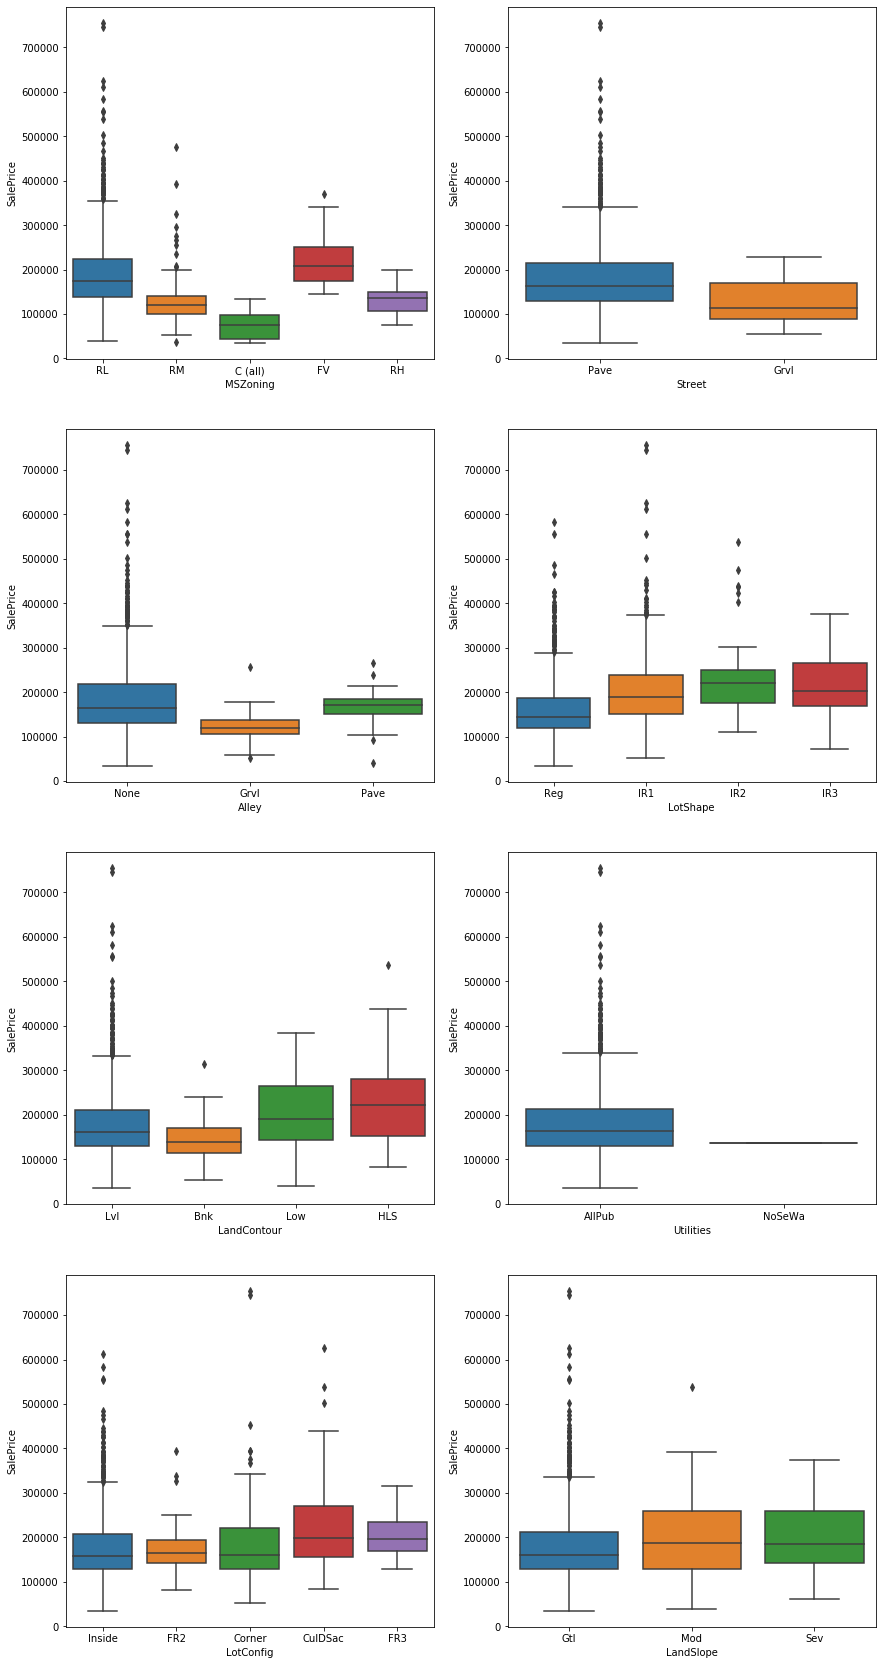

In [26]:
#plotting categorical variables
fig, axes = plt.subplots(4, 2, figsize = (6,12)) 
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(data= train_data, x='MSZoning', y = "SalePrice", ax=axes[0,0])
sns.boxplot(data= train_data, x='Street', y = "SalePrice", ax=axes[0,1])
sns.boxplot(data= train_data, x='Alley', y = "SalePrice", ax=axes[1,0])
sns.boxplot(data= train_data, x='LotShape', y = "SalePrice", ax=axes[1,1])
sns.boxplot(data= train_data, x='LandContour', y = "SalePrice", ax=axes[2,0])
sns.boxplot(data= train_data, x='Utilities', y = "SalePrice", ax=axes[2,1])
sns.boxplot(data= train_data, x='LotConfig', y = "SalePrice", ax=axes[3,0])
sns.boxplot(data= train_data, x='LandSlope', y = "SalePrice", ax=axes[3,1])

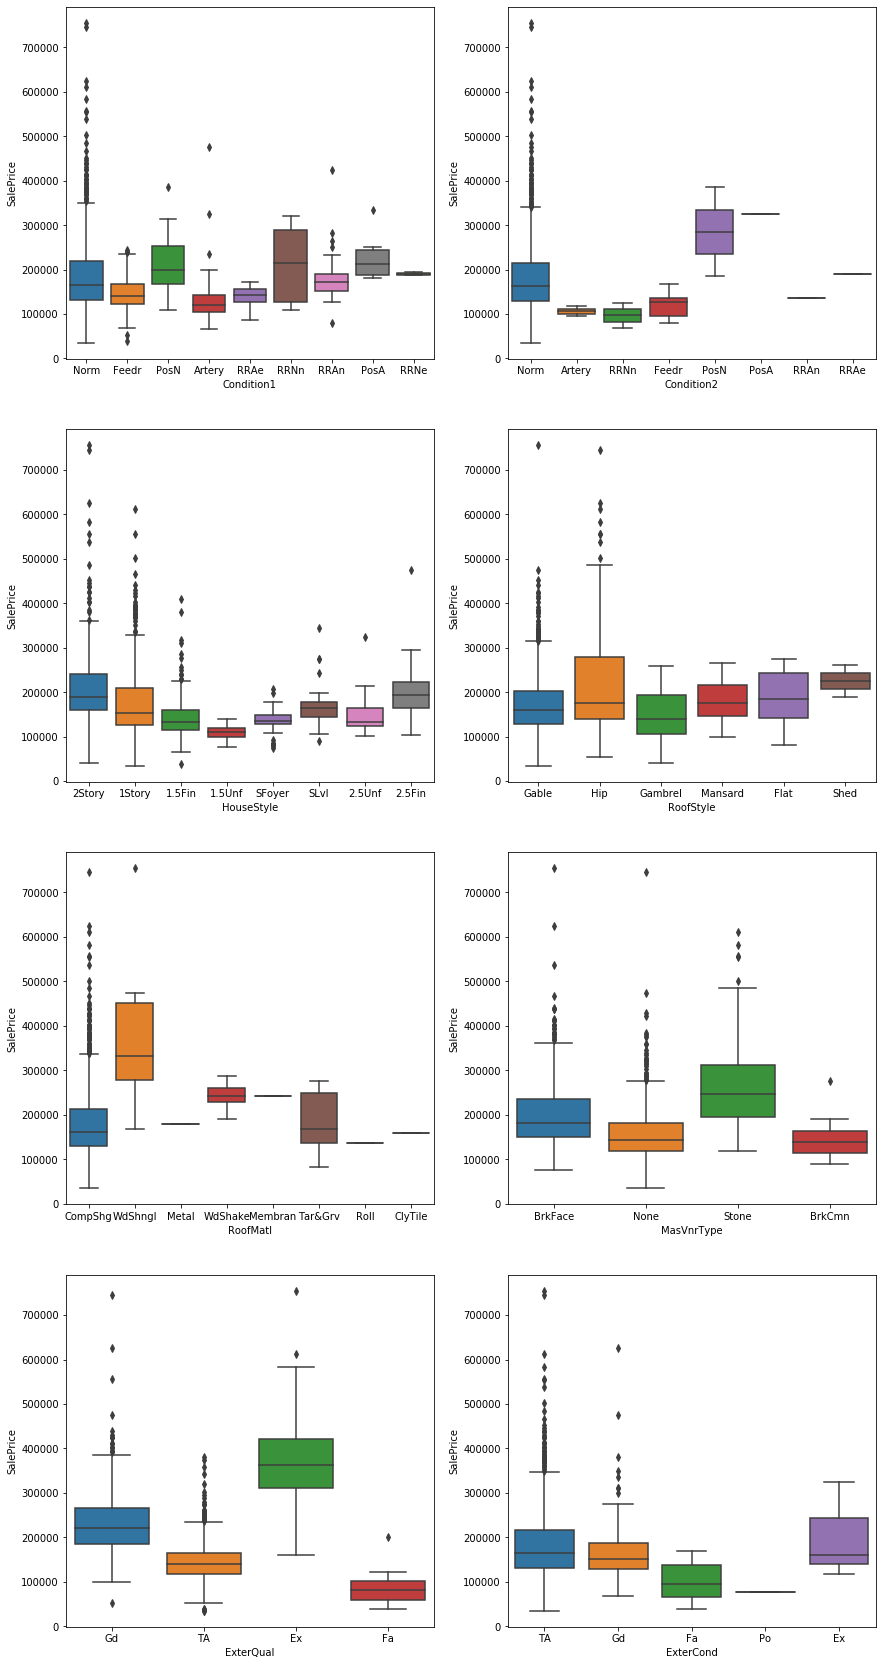

In [27]:
#plotting categorical variables
fig, axes = plt.subplots(4, 2, figsize = (6,12)) 
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(data= train_data, x='Condition1', y = "SalePrice", ax=axes[0,0])
sns.boxplot(data= train_data, x='Condition2', y = "SalePrice", ax=axes[0,1])
sns.boxplot(data= train_data, x='HouseStyle', y = "SalePrice", ax=axes[1,0])
sns.boxplot(data= train_data, x='RoofStyle', y = "SalePrice", ax=axes[1,1])
sns.boxplot(data= train_data, x='RoofMatl', y = "SalePrice", ax=axes[2,0])
sns.boxplot(data= train_data, x='MasVnrType', y = "SalePrice", ax=axes[2,1])
sns.boxplot(data= train_data, x='ExterQual', y = "SalePrice", ax=axes[3,0])
sns.boxplot(data= train_data, x='ExterCond', y = "SalePrice", ax=axes[3,1])



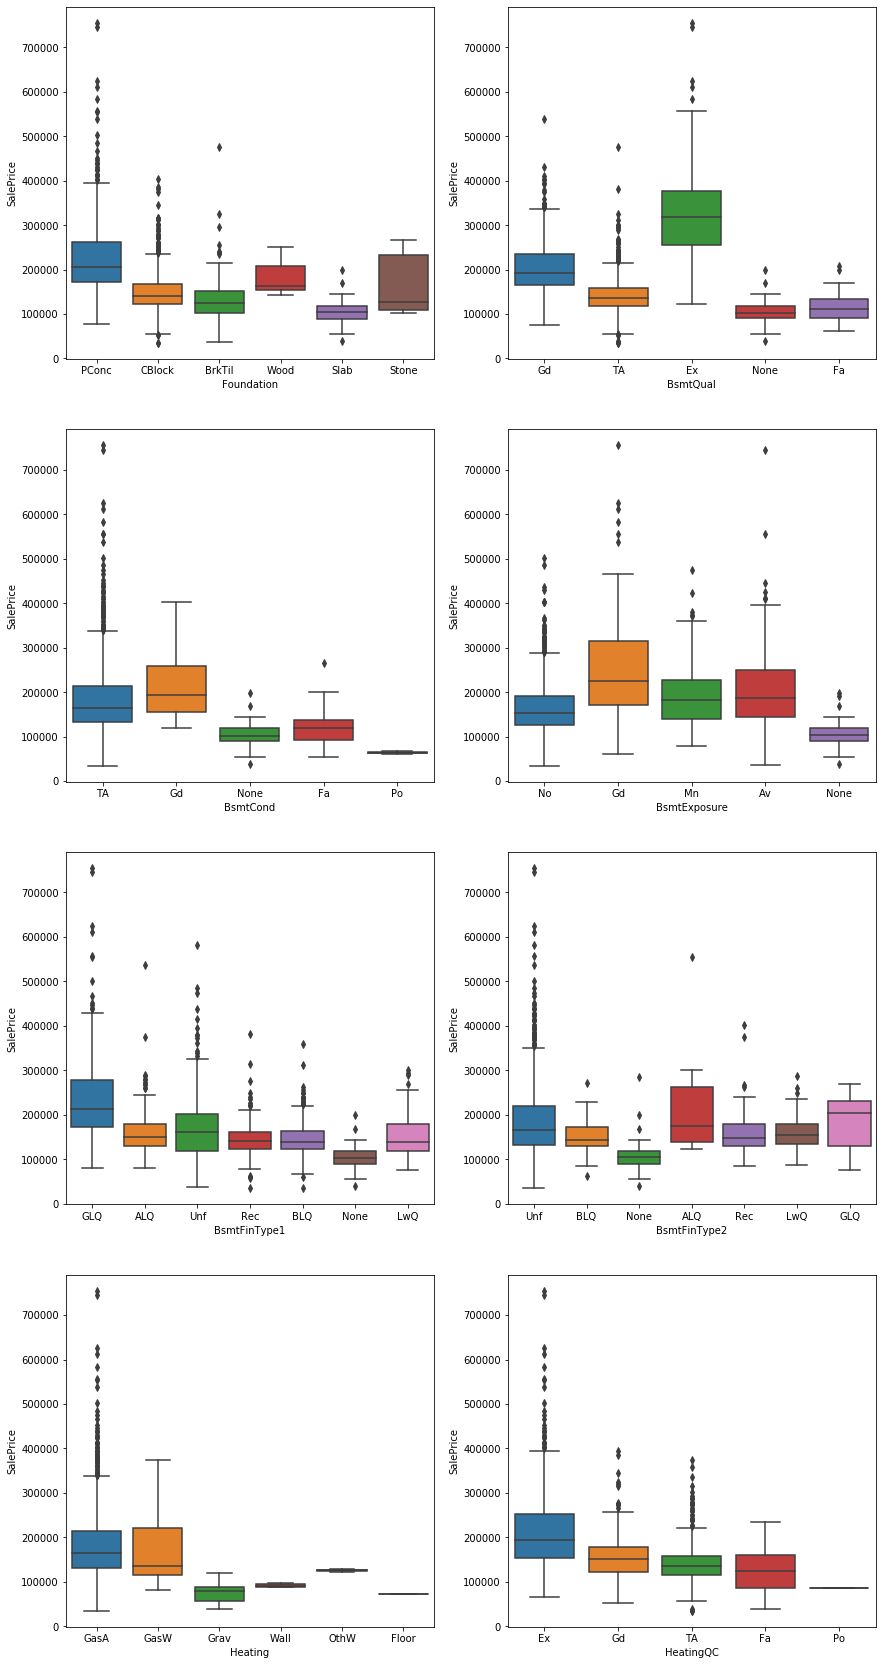

In [28]:
#plotting categorical variables
fig, axes = plt.subplots(4, 2, figsize = (6,12)) 
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(data= train_data, x='Foundation', y = "SalePrice", ax=axes[0,0])
sns.boxplot(data= train_data, x='BsmtQual', y = "SalePrice", ax=axes[0,1])
sns.boxplot(data= train_data, x='BsmtCond', y = "SalePrice", ax=axes[1,0])
sns.boxplot(data= train_data, x='BsmtExposure', y = "SalePrice", ax=axes[1,1])
sns.boxplot(data= train_data, x='BsmtFinType1', y = "SalePrice", ax=axes[2,0])
sns.boxplot(data= train_data, x='BsmtFinType2', y = "SalePrice", ax=axes[2,1])
sns.boxplot(data= train_data, x='Heating', y = "SalePrice", ax=axes[3,0])
sns.boxplot(data= train_data, x='HeatingQC', y = "SalePrice", ax=axes[3,1])


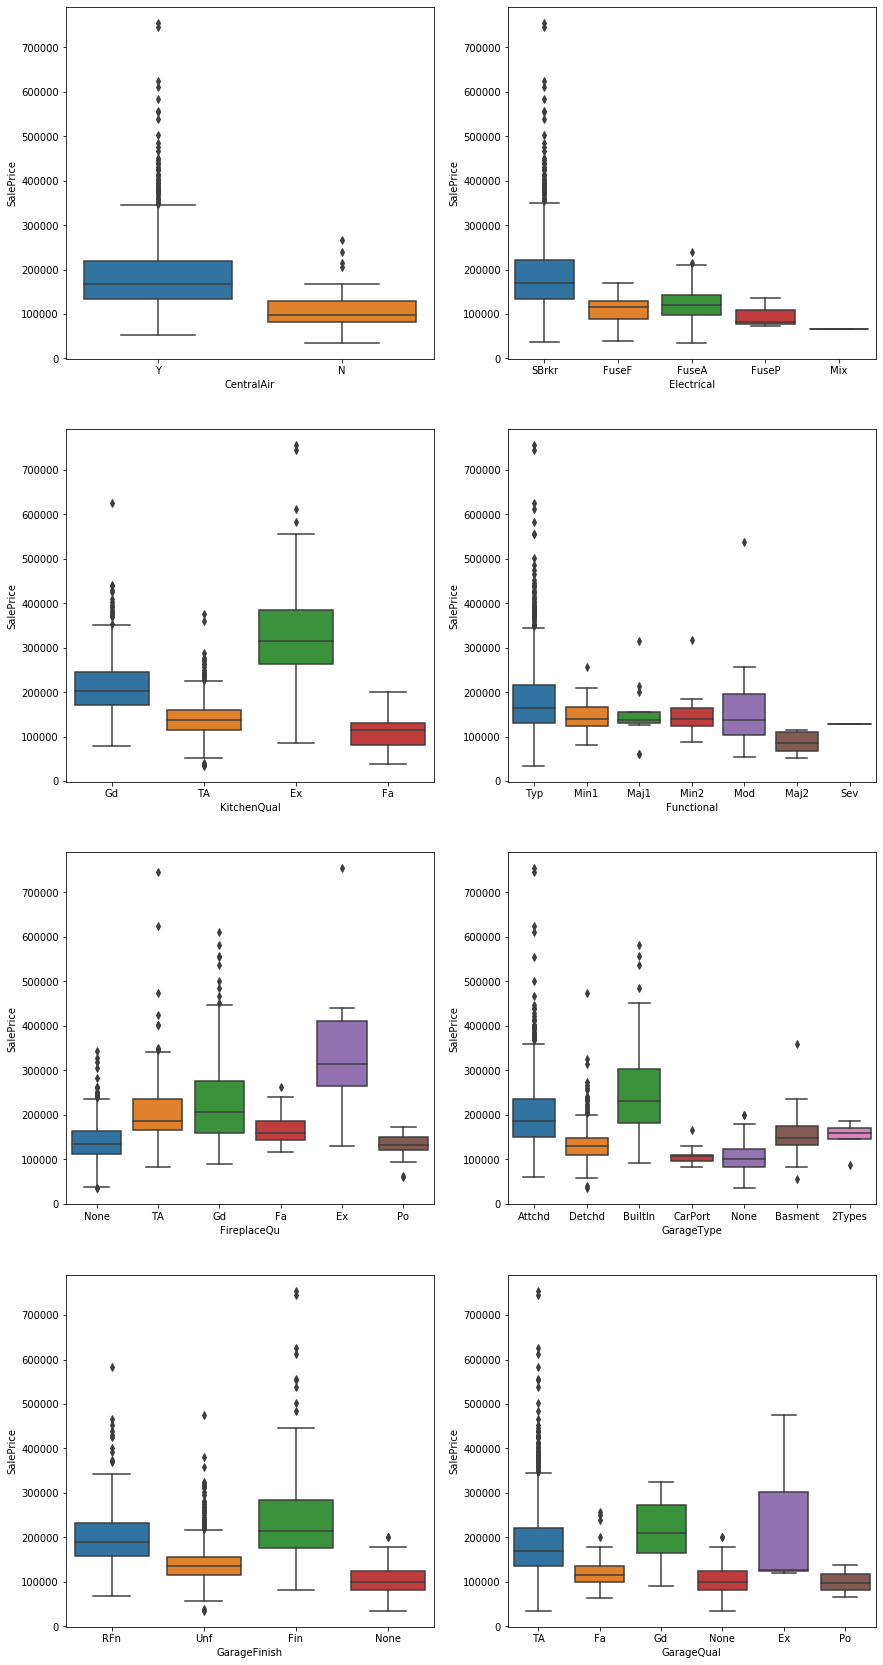

In [29]:
#plotting categorical variables
fig, axes = plt.subplots(4, 2, figsize = (6,12)) 
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(data= train_data, x='CentralAir', y = "SalePrice", ax=axes[0,0])
sns.boxplot(data= train_data, x='Electrical', y = "SalePrice", ax=axes[0,1])
sns.boxplot(data= train_data, x='KitchenQual', y = "SalePrice", ax=axes[1,0])
sns.boxplot(data= train_data, x='Functional', y = "SalePrice", ax=axes[1,1])
sns.boxplot(data= train_data, x='FireplaceQu', y = "SalePrice", ax=axes[2,0])
sns.boxplot(data= train_data, x='GarageType', y = "SalePrice", ax=axes[2,1])
sns.boxplot(data= train_data, x='GarageFinish', y = "SalePrice", ax=axes[3,0])
sns.boxplot(data= train_data, x='GarageQual', y = "SalePrice", ax=axes[3,1])


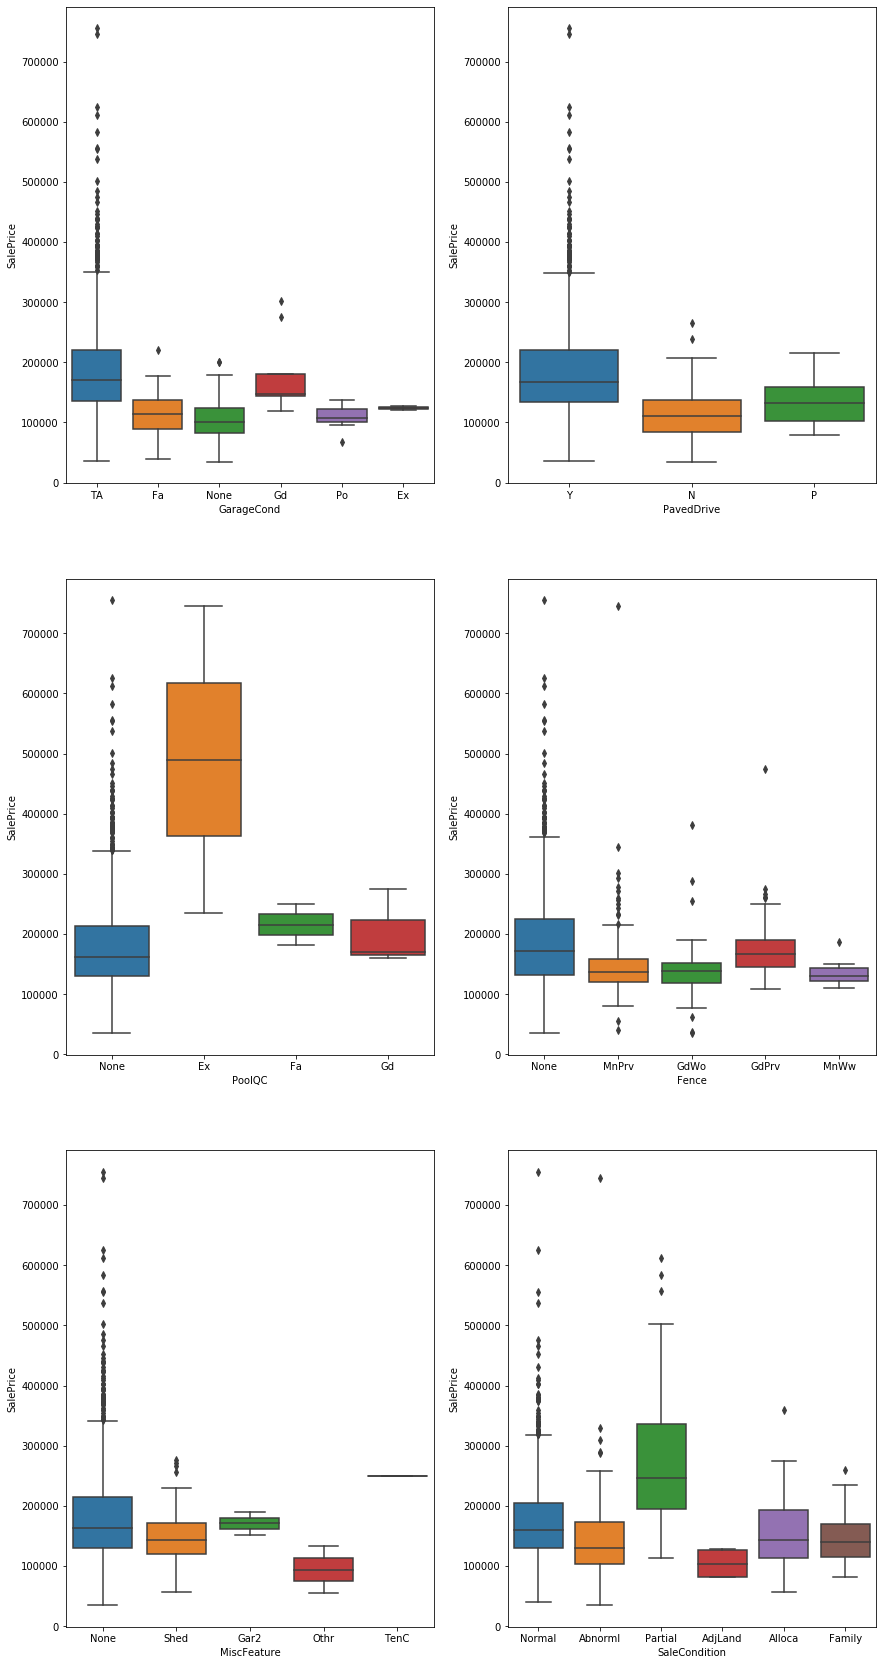

In [30]:
#plotting categorical variables
fig, axes = plt.subplots(3, 2, figsize = (6,12)) 
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(data= train_data, x='GarageCond', y = "SalePrice", ax=axes[0,0])
sns.boxplot(data= train_data, x='PavedDrive', y = "SalePrice", ax=axes[0,1])
sns.boxplot(data= train_data, x='PoolQC', y = "SalePrice", ax=axes[1,0])
sns.boxplot(data= train_data, x='Fence', y = "SalePrice", ax=axes[1,1])
sns.boxplot(data= train_data, x='MiscFeature', y = "SalePrice", ax=axes[2 ,0])
sns.boxplot(data= train_data, x='SaleCondition', y = "SalePrice", ax=axes[2,1])


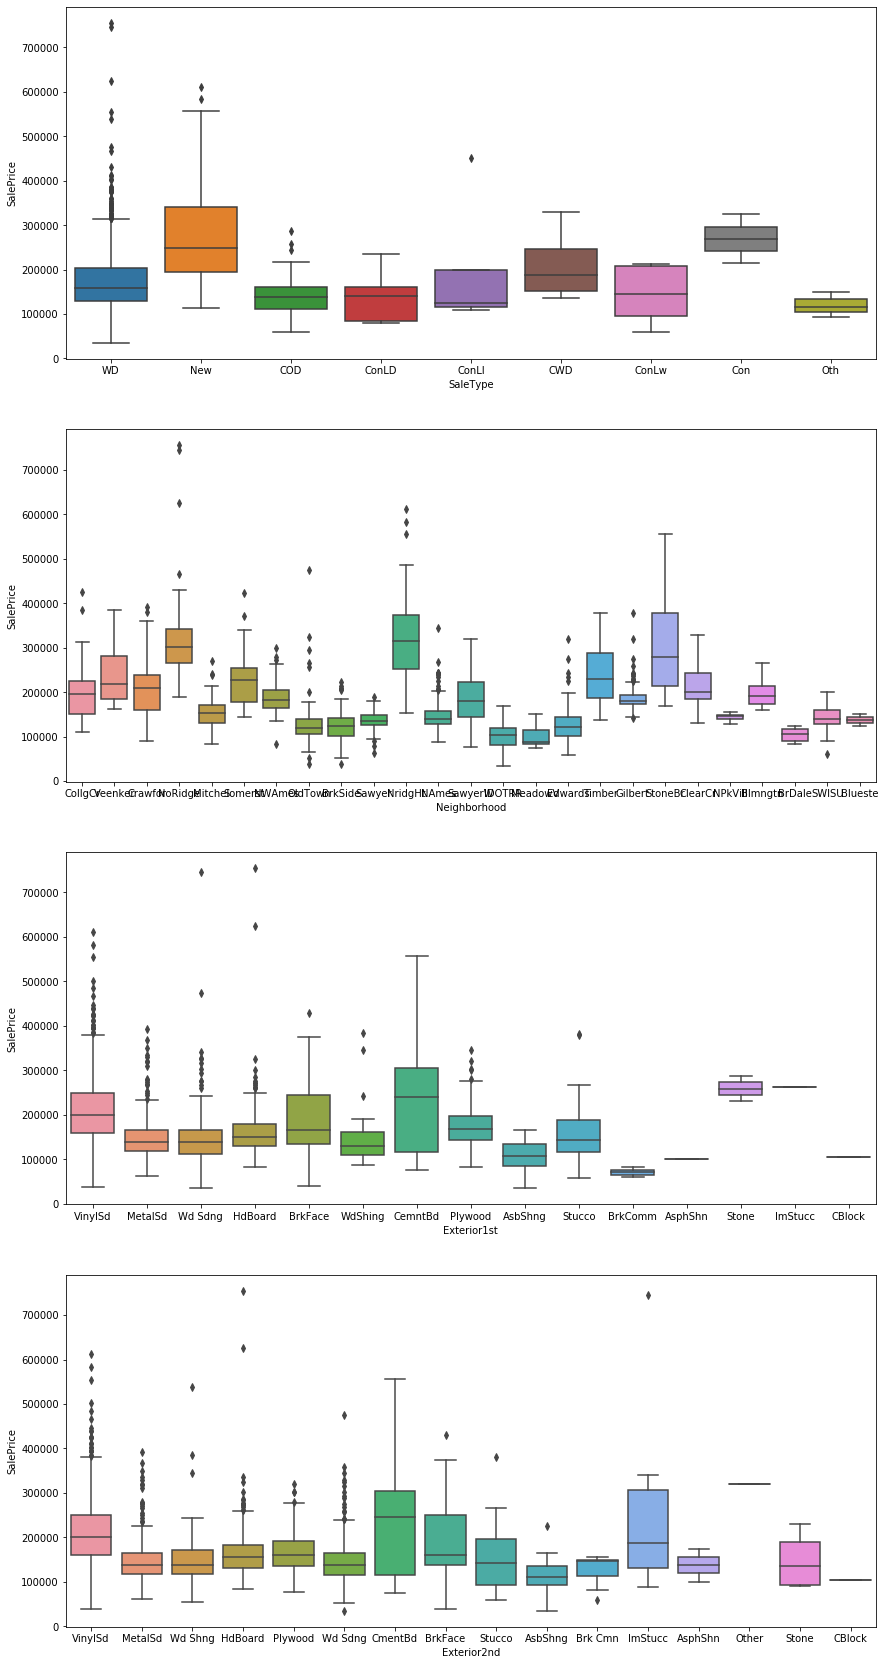

In [31]:
#plotting categorical variables
fig, axes = plt.subplots(4, figsize = (6,12)) 
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(data= train_data, x='SaleType', y = "SalePrice", ax=axes[0])
sns.boxplot(data= train_data, x='Neighborhood', y = "SalePrice", ax=axes[1])
sns.boxplot(data= train_data, x='Exterior1st', y = "SalePrice", ax = axes[2])
sns.boxplot(data= train_data, x='Exterior2nd', y = "SalePrice", ax = axes[3])

From the graphs above, the variables that seem mostly correlated with the sale price are: MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'. 


In [38]:
cat_variables = [ 'MSZoning', 'Neighborhood','RoofMatl', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual','FireplaceQu','GarageFinish',
                  'PoolQC','SaleCondition', 'SaleType']
categorical_columns = categorical_train.columns
drop_columns = set(categorical_columns)-set(cat_variables)

train_data = train_data.drop(drop_columns,axis=1)
test_data = test_data.drop(drop_columns,axis=1)

train_data.shape
test_data.shape

KeyError: "['HeatingQC' 'GarageType' 'GarageCond' 'BsmtCond' 'Exterior1st'\n 'Exterior2nd' 'Utilities' 'BsmtFinType2' 'PavedDrive' 'LandContour'\n 'RoofStyle' 'BsmtExposure' 'Condition1' 'Alley' 'LotConfig'\n 'BsmtFinType1' 'GarageQual' 'Functional' 'Heating' 'BldgType' 'ExterCond'\n 'Street' 'Fence' 'HouseStyle' 'LotShape' 'MiscFeature' 'Foundation'\n 'LandSlope'] not found in axis"

drop columns that we don't need


## 5. Preprocessing

It is time to do the last arrangements before modelling.
Firs, as mentioned, I will log tranform the target variable

In [39]:
#log transformation
Y_train=np.log(train_data['SalePrice'])


transform the categorical variables into dummies; 

In [40]:
# Split features and labels
#train_labels = train_data['SalePrice'].reset_index(drop=True)
train_features = train_data.drop('SalePrice', axis=1)
#test_features = test_data.drop('SalePrice', axis=1)

# Combine train and test features in order to apply the feature transformation to the entire dataset
#all_features = pd.concat([train_features, test_features]).reset_index(drop=True)


In [45]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 22 columns):
MSZoning         1451 non-null object
Neighborhood     1451 non-null object
Condition2       1451 non-null object
OverallQual      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofMatl         1451 non-null object
MasVnrType       1451 non-null object
ExterQual        1451 non-null object
BsmtQual         1451 non-null object
CentralAir       1451 non-null object
Electrical       1451 non-null object
1stFlrSF         1451 non-null int64
GrLivArea        1451 non-null int64
FullBath         1451 non-null int64
KitchenQual      1451 non-null object
FireplaceQu      1451 non-null object
GarageFinish     1451 non-null object
GarageCars       1451 non-null int64
PoolQC           1451 non-null object
SaleType         1451 non-null object
SaleCondition    1451 non-null object
dtypes: int64(7), object(15)
memory usage: 300.7+ KB


In [46]:
factors = train_features.select_dtypes("object")
print(factors.shape)
factor_dummies = pd.get_dummies(factors)
quantitive = train_features.select_dtypes(["int64","float64"])
print(quantitive.shape)
X = pd.concat([quantitive,factor_dummies], axis = 1)
X.head()

(1451, 15)
(1451, 7)


,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,856,1710,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,6,1976,1976,1262,1262,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,7,2001,2002,920,1786,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,7,1915,1970,961,1717,1,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,8,2000,2000,1145,2198,2,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# 5. Modelling

Now that evrything is set, I will try different regression algorithms:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regression
* Random Forest Regression
* XGBoost Regression

Five crossvalidation folders will be used. 

In [ ]:
eg = LinearRegression()
>>> reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
LinearRegression()
>>> reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
LinearRegression()
>>> reg.coef_
array([0.5, 0.5])

In [36]:
score_calc = 'neg_mean_squared_error'

In [37]:
#Linear Regression
LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search= GridSearchCV(LR, parameters, cv=5, verbose=1 , scoring = score_calc)
grid_search.fit(X_train, Y_train)

LR_score=grid_search.best_score_
LR_params=grid_search.best_params_
print(LR_score)
print(LR_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-0.024821620502910306
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


In [38]:
#Ridge Regression
RR = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_search= GridSearchCV(RR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

RR_score=grid_search.best_score_
RR_params=grid_search.best_params_
print(RR_score)
print(RR_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s


-0.023839047569962045
{'alpha': 1, 'normalize': False, 'tol': 1e-06}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.4s finished


In [39]:
#Lasso Regression
LaR = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_search= GridSearchCV(LaR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

LaR_score=grid_search.best_score_
LaR_params=grid_search.best_params_
print(LaR_score)
print(LaR_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s


-0.024551096273114727
{'alpha': 0.001, 'normalize': False, 'tol': 1e-06}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.7s finished


In [40]:
#DecisionTree Regression
DTR = DecisionTreeRegressor()
parameters = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] }
grid_search= GridSearchCV(DTR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

DTR_score=grid_search.best_score_
DTR_params=grid_search.best_params_
print(DTR_score)
print(DTR_params)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s


-0.03934172526717449
{'max_depth': 7, 'max_features': 14, 'max_leaf_nodes': None, 'min_samples_split': 20, 'presort': False}


[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   10.4s finished
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [41]:
#RandomForest Regression
RFR=RandomForestRegressor()
parameters = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100] }
grid_search= GridSearchCV(RFR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

RFR_score=grid_search.best_score_
RFR_params=grid_search.best_params_
print(RFR_score)
print(RFR_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.1s finished


-0.022610781206606343
{'min_samples_split': 3, 'n_estimators': 70}


In [42]:
#XGBoost Regression
XGB=XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
grid_search= GridSearchCV(XGB, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

XGB_score=grid_search.best_score_
XGB_params=grid_search.best_params_
print(XGB_score)
print(XGB_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.0min finished


[17:02:16] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:16] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:17] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
-0.019305770482755134
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


Let's compare the models with each other

In [43]:
list_scores = [LR_score, RR_score, LaR_score, DTR_score,
               RFR_score, XGB_score]
list_regressors = ['Linear','Ridge','Lasso','DT','RF','XGB']

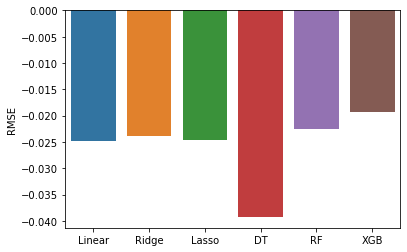

In [44]:
fig, ax = plt.subplots()
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()

XGBoost is the one that performs better and for this reason i will use it to make the predictions.

In [45]:
XGB_tuned=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth=5, 
                  min_child_weight= 4, n_estimators=500, nthread=4, objective= 'reg:linear',
                  silent=1, subsample=0.7)

XGB_tuned.fit(X_train,Y_train)

[17:02:19] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:19] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:20] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
Y_hat = XGB_tuned.predict(X_test).astype(float)
Y_hat

array([11.67997646, 11.93177032, 12.05281162, ..., 11.93165779,
       11.61259937, 12.31444931])

Text(0.5, 0, 'Xgboost Feature Importance')

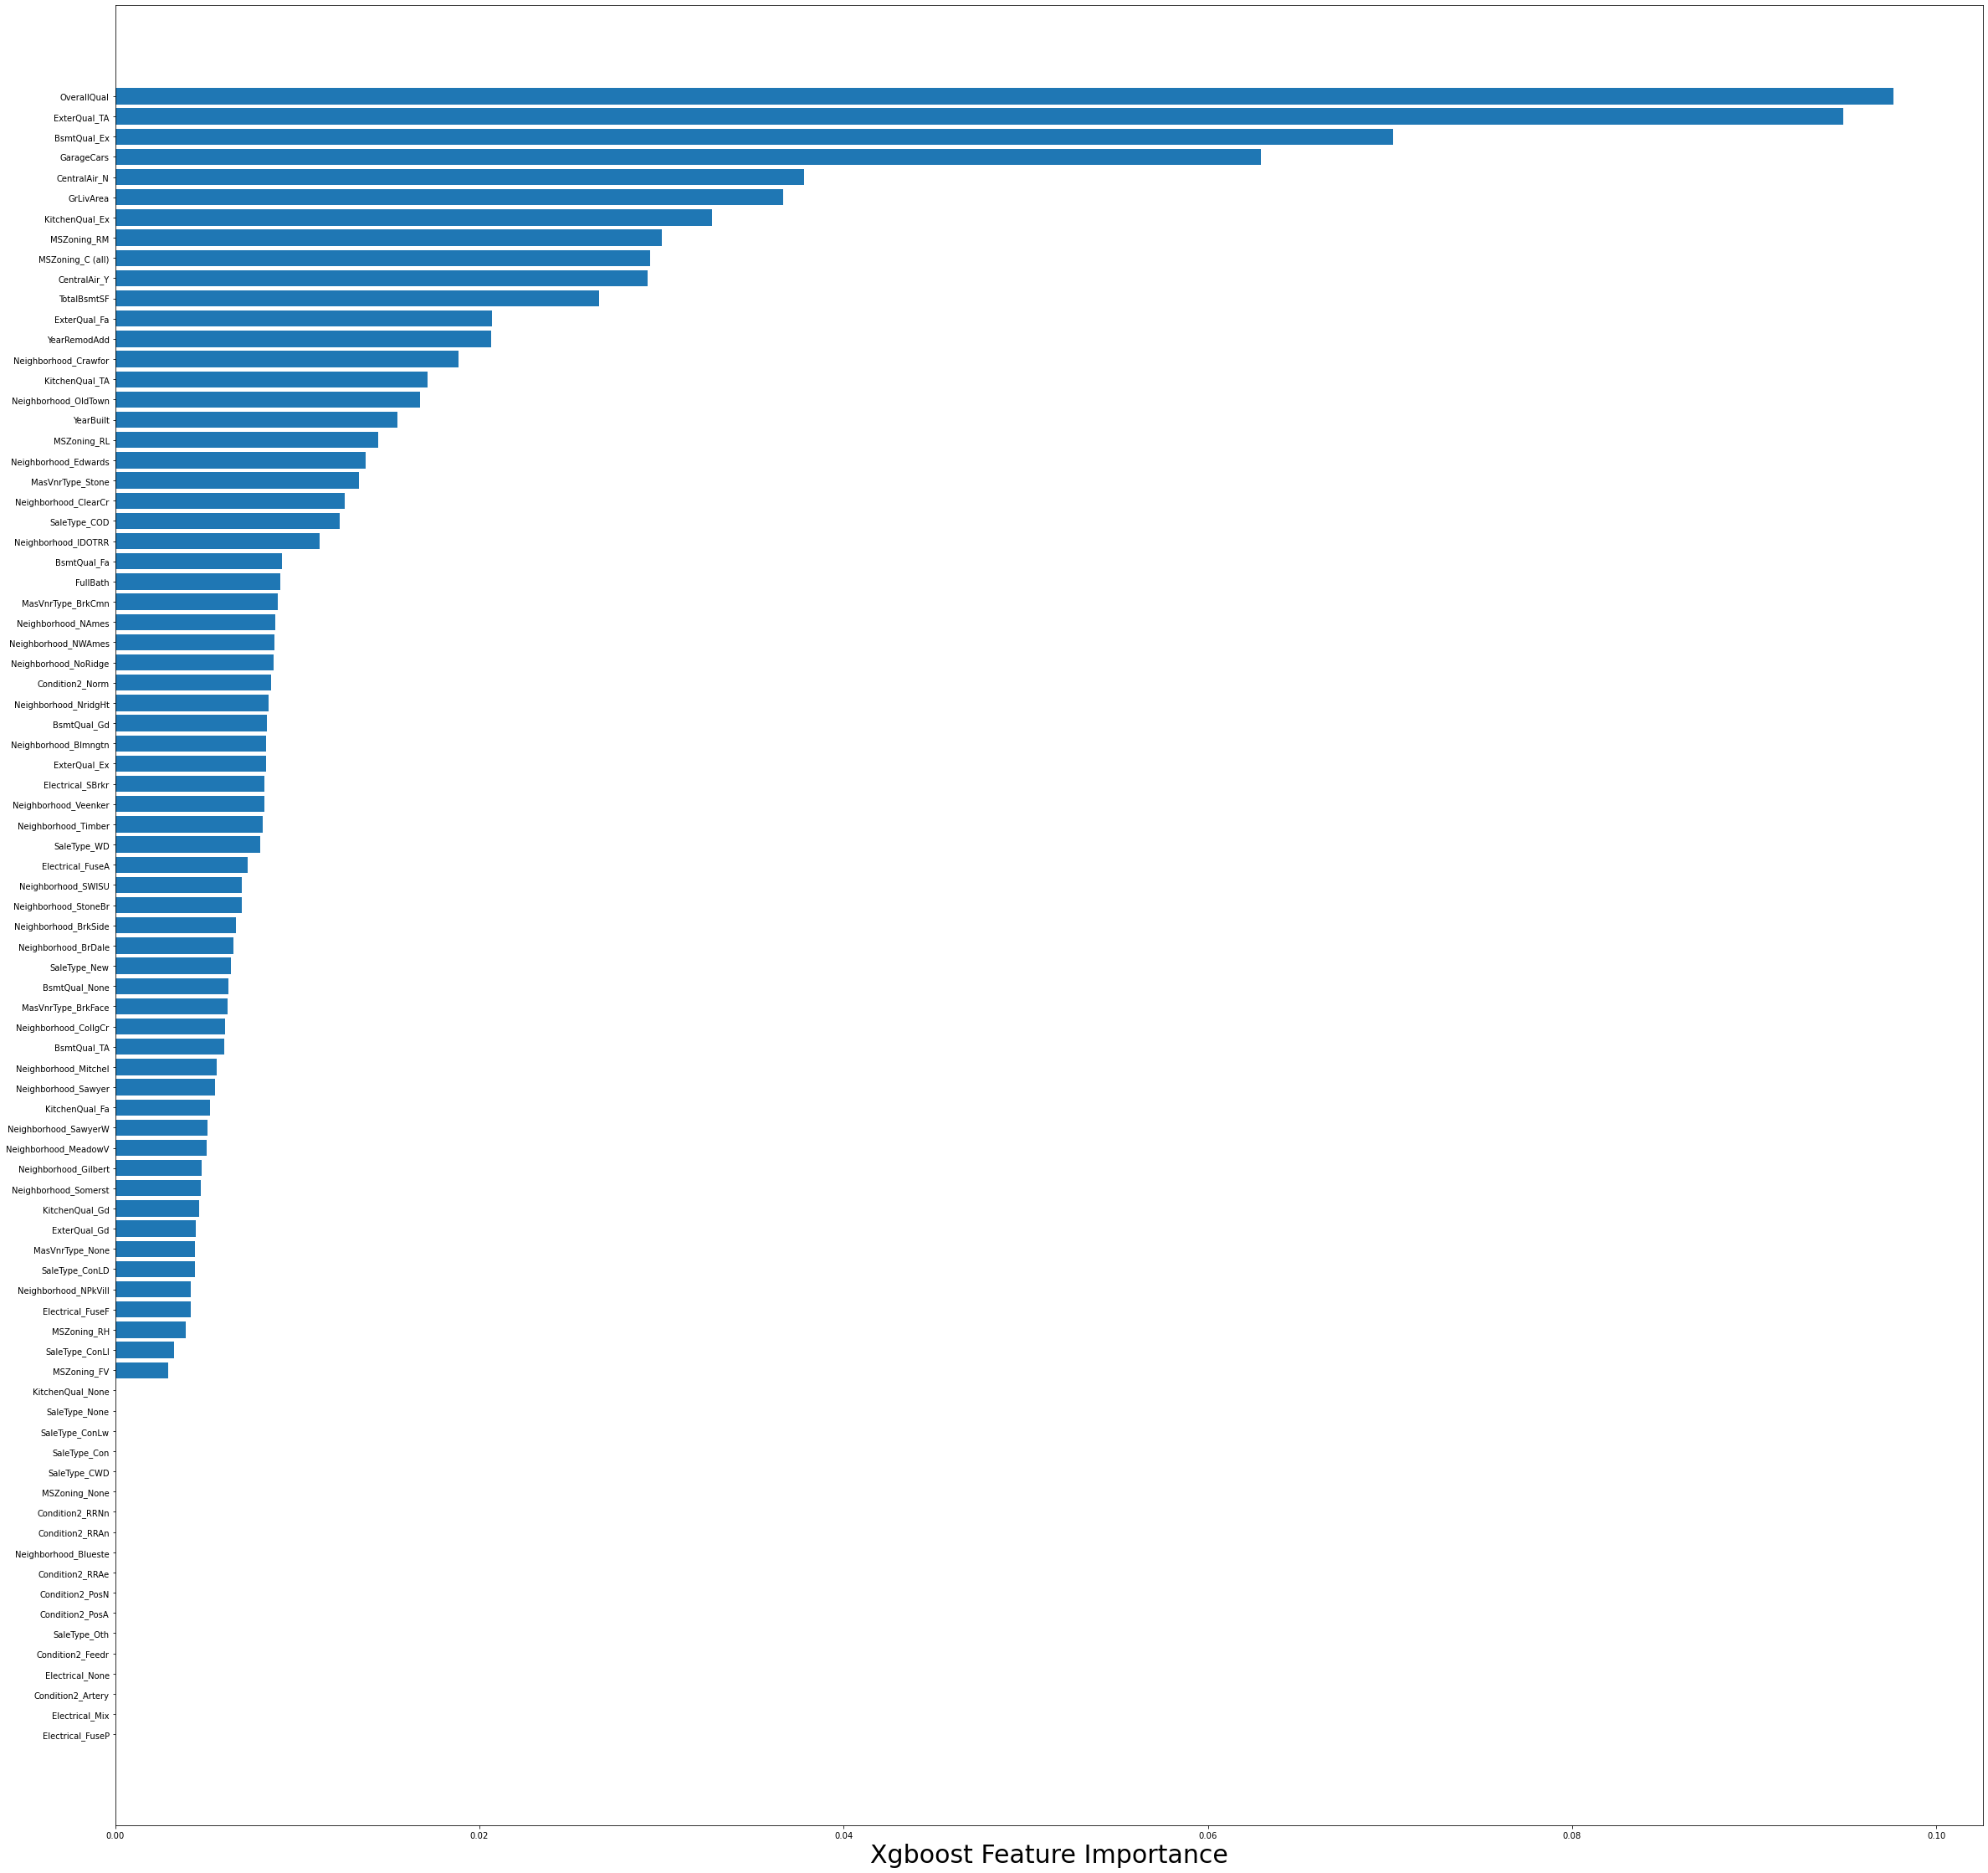

In [47]:
sorted_idx = XGB_tuned.feature_importances_.argsort()
plt.figure(figsize=(40,40))
#plt.rcParams['font.size'] = '30'
plt.barh(X_train.columns[sorted_idx], XGB_tuned.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance",fontsize=30)

In [48]:
XGB_submission = {'Id': test_data.Id, 'SalePrice': np.exp(Y_hat)}
submission_XGB = pd.DataFrame(data=XGB_submission )
submission_XGB.to_csv('submission_XGB.csv', index=False)